<a href="https://colab.research.google.com/github/jeevan371/Jeev_proj/blob/main/Attrition_2nd_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Employee Attrition and Analysis

This program compares machine learning models for their accuracy and select the best model for attrition prediction

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload() 

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
# Store the data into a data frame
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

#print the1st 10 rows in data frame
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [22]:
#Category and values for feature set
categ = ['Employee will stay', 'Employee will leave']
custom_dt = [[2,624,2,0,1,1,0,64,2,7,3,2,809,8,1,8,0,0,6,4,0,5,23]]

In [5]:
df.shape

(1470, 35)

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.isnull().values.any()

False

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Number of employees that stayed and left
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

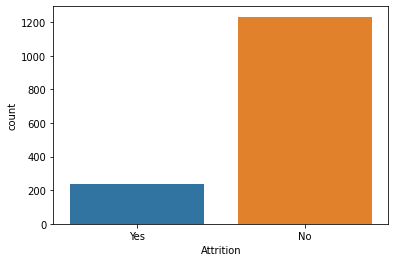

In [ ]:
#Visualize the above
sns.countplot(x=df['Attrition'])

In [ ]:
#Show the number of employees stayed and left by age
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x='Age',hue='Attrition',data=df, palette='colorblind')

In [ ]:
# print all of the datatypes and their unique values
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ': '+ str(df[column].unique()))
    print(df[column].value_counts())
    print('____________________________________________________')

In [8]:
# Remove some useless columns
df = df.drop('Over18', axis =1)
df = df.drop('EmployeeNumber', axis=1)
df = df.drop('StandardHours', axis=1)
df = df.drop('EmployeeCount', axis=1)

In [9]:
df = df.drop('Education', axis =1)
df = df.drop('JobLevel', axis=1)
df = df.drop('MonthlyRate', axis=1)
df = df.drop('PercentSalaryHike', axis=1)
df = df.drop('PerformanceRating', axis=1)
df = df.drop('RelationshipSatisfaction', axis=1)
df = df.drop('StockOptionLevel', axis=1)


In [29]:
df = df.drop('DistanceFromHome', axis=1)

In [30]:
df

,Attrition,BusinessTravel,DailyRate,Department,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,1,1,0,64,2,7,3,2,809,8,1,8,0,0,6,4,0,5,23
1,0,1,113,1,1,2,1,31,1,6,1,1,682,1,0,10,3,2,10,7,1,7,31
2,1,2,805,1,4,3,1,62,1,2,2,2,62,6,1,7,3,2,0,0,0,0,19
3,0,1,820,1,1,3,0,26,2,6,2,1,313,1,1,8,3,2,8,7,3,0,15
4,0,2,312,1,3,0,1,10,2,2,1,1,399,9,0,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,3,2,1,11,3,2,3,1,210,4,0,17,3,2,5,2,0,3,18
1466,0,2,327,1,3,3,1,12,1,0,0,1,1070,4,0,9,5,2,7,7,1,7,21
1467,0,2,39,1,1,1,1,57,3,4,1,1,821,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,3,3,1,33,1,7,1,1,730,2,0,17,3,1,9,6,0,8,31


In [10]:
#Get the correlation
df.corr()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.010146,0.024287,0.029820,-0.004892,0.497855,0.299635,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,0.018355,0.023381,0.046135,0.030571,0.007707,0.038153,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,-0.016075,0.031131,0.008783,-0.003669,-0.017014,-0.029251,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,1.000000,-0.049857,-0.008278,-0.006784,-0.006259,0.012594,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,-0.049857,1.000000,0.042861,-0.071335,-0.015794,0.022157,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,-0.008278,0.042861,1.000000,-0.021476,-0.015271,0.015012,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.006784,-0.071335,-0.021476,1.000000,-0.007157,-0.055699,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,-0.006259,-0.015794,-0.015271,-0.007157,1.000000,0.149515,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,0.038153,-0.029251,0.012594,0.022157,0.015012,-0.055699,0.149515,1.000000,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319
TotalWorkingYears,0.680381,0.014515,0.004628,-0.002693,-0.002334,-0.005533,-0.020185,0.772893,0.237639,1.000000,-0.035662,0.001008,0.628133,0.460365,0.404858,0.459188


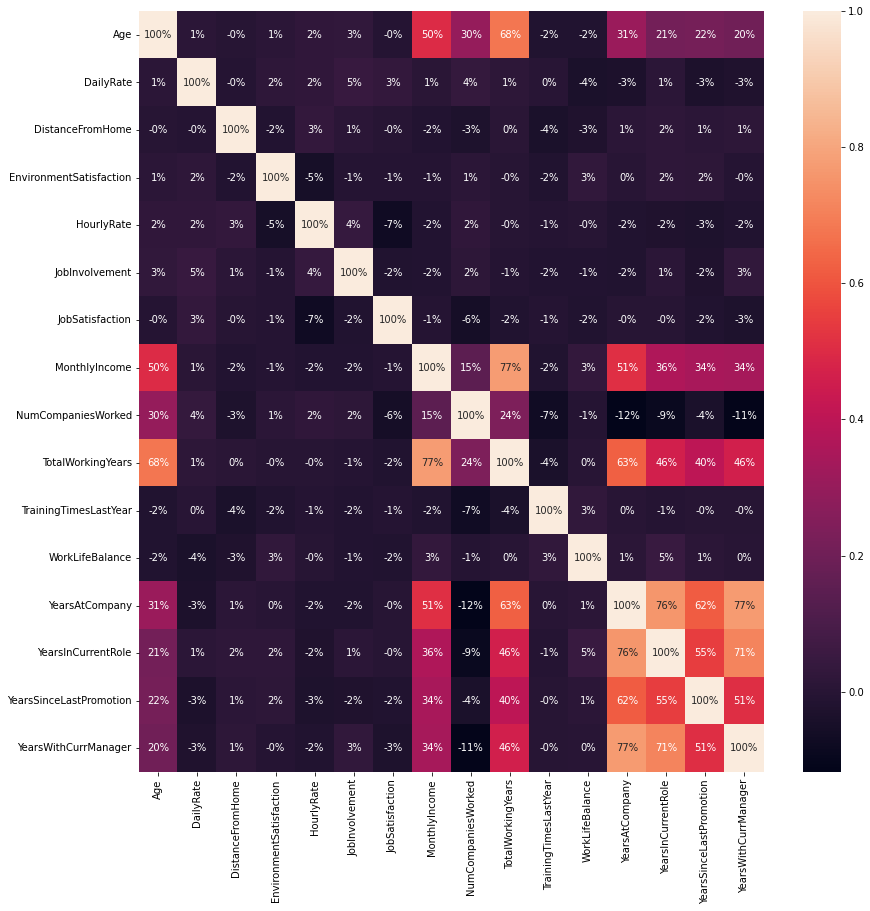

In [11]:
# Visualize correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt= '.0%')

In [12]:
# Transform the data
# Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.float64:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [13]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,64,2,7,3,2,809,8,1,8,0,0,6,4,0,5
1,31,0,1,113,1,7,1,2,1,31,1,6,1,1,682,1,0,10,3,2,10,7,1,7
2,19,1,2,805,1,1,4,3,1,62,1,2,2,2,62,6,1,7,3,2,0,0,0,0
3,15,0,1,820,1,2,1,3,0,26,2,6,2,1,313,1,1,8,3,2,8,7,3,0
4,9,0,2,312,1,1,3,0,1,10,2,2,1,1,399,9,0,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,3,2,1,11,3,2,3,1,210,4,0,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,3,3,1,12,1,0,0,1,1070,4,0,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,1,1,1,57,3,4,1,1,821,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,3,3,1,33,1,7,1,1,730,2,0,17,3,1,9,6,0,8


In [14]:
# Create a new column
df['Age_Years'] = df['Age']


In [15]:
#Drop Age column
df = df.drop('Age', axis = 1)

In [16]:
#Show the data frame
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,0,64,2,7,3,2,809,8,1,8,0,0,6,4,0,5,23
1,0,1,113,1,7,1,2,1,31,1,6,1,1,682,1,0,10,3,2,10,7,1,7,31
2,1,2,805,1,1,4,3,1,62,1,2,2,2,62,6,1,7,3,2,0,0,0,0,19
3,0,1,820,1,2,1,3,0,26,2,6,2,1,313,1,1,8,3,2,8,7,3,0,15
4,0,2,312,1,1,3,0,1,10,2,2,1,1,399,9,0,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,3,2,1,11,3,2,3,1,210,4,0,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,3,3,1,12,1,0,0,1,1070,4,0,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,1,1,1,57,3,4,1,1,821,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,3,3,1,33,1,7,1,1,730,2,0,17,3,1,9,6,0,8,31


In [17]:
#spit the dataset
x = df.iloc[:, 1:df.shape[1]].values
y=df.iloc[:,0].values
x

array([[  2, 624,   2, ...,   0,   5,  23],
       [  1, 113,   1, ...,   1,   7,  31],
       [  2, 805,   1, ...,   0,   0,  19],
       ...,
       [  2,  39,   1, ...,   0,   3,   9],
       [  1, 579,   2, ...,   0,   8,  31],
       [  2, 336,   1, ...,   1,   2,  16]])

In [18]:
#Split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [43]:
#Normalization for logistic regression and svm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [19]:
#Use the random forest classifier model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [20]:
# Get the accuracy on the training dataset
forest.score(x_train, y_train)

0.9773139745916516

In [34]:
#Show the confusion matrix and accuracy score for the model on the test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, forest.predict(x_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
a1_score = ((TP + TN) / (TP +TN +FN + FP)  ) *100
print(a1_score)


[[305   5]
 [ 47  11]]
89.86956521739131


In [23]:
#predict employee attrition in random forest
print(categ[int(forest.predict(custom_dt))])

Employee will leave


Decision trees

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
prediction_dt = dt.predict(x_test)

In [ ]:
prediction_dt.size

368

In [59]:
#Testing accuracy of decision tree
a2_score = (accuracy_score(y_test, prediction_dt)) *100
print(a2_score)

76.63043478260869


In [39]:
#Employee attrition prediction
print(categ[int(dt.predict(custom_dt))])

Employee will leave


KNN Algorithm

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = classifier.predict(x_test)
a3_score = (accuracy_score(y_test, y_pred)) *100
print(a3_score)

82.88043478260869


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       310
           1       0.39      0.16      0.22        58

    accuracy                           0.83       368
   macro avg       0.62      0.56      0.56       368
weighted avg       0.78      0.83      0.80       368

[[296  14]
 [ 49   9]]


In [ ]:
#prediction using KNN algorithm
print(categ[int(classifier.predict(custom_dt))])

Employee will stay


Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_multilabel_classification

In [45]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred2 = log_reg.predict(X_test)
a4_score = (accuracy_score(y_test, y_pred2)) *100
print(a4_score)

83.77173913043478


In [47]:
#Display confusion matrix
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       310
           1       0.74      0.34      0.47        58

    accuracy                           0.88       368
   macro avg       0.81      0.66      0.70       368
weighted avg       0.87      0.88      0.86       368

[[303   7]
 [ 38  20]]


In [ ]:
#prediction using Logistic Regression algorithm
print(categ[int(log_reg.predict(custom_dt))])

Employee will stay


Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [49]:
model.fit(x_train, y_train)

GaussianNB()

In [50]:
model.score(x_test, y_test)

0.8396739130434783

In [52]:
y_pred3 = model.predict(x_test)
a5_score = (accuracy_score(y_test, y_pred3)) *100
print(a5_score)
#Display confusio matrix
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

87.96739130434783
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       310
           1       0.49      0.53      0.51        58

    accuracy                           0.84       368
   macro avg       0.70      0.72      0.71       368
weighted avg       0.85      0.84      0.84       368

[[278  32]
 [ 27  31]]


In [ ]:
#prediction using Naive Bayes algorithm
print(categ[int(model.predict(custom_dt))])

Employee will leave


Support Vector Machine

In [53]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)



SVC(kernel='linear')

In [55]:
y_pred4 = clf.predict(X_test)
a6_score = (accuracy_score(y_test , y_pred4)) *100
print(a6_score)

85.22826086956522


In [56]:
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       310
           1       0.76      0.28      0.41        58

    accuracy                           0.87       368
   macro avg       0.82      0.63      0.67       368
weighted avg       0.86      0.87      0.85       368

[[305   5]
 [ 42  16]]


In [ ]:
#prediction using Logistic Regression algorithm
print(categ[int(clf.predict(custom_dt))])

Employee will stay


In [60]:
models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression', 'Naive Bayes', 'SVM']
acc = [a1_score, a2_score, a3_score, a4_score, a5_score, a6_score]
acc = np.float16(acc) 
print(acc)

[89.9  76.6  82.9  83.75 87.94 85.25]


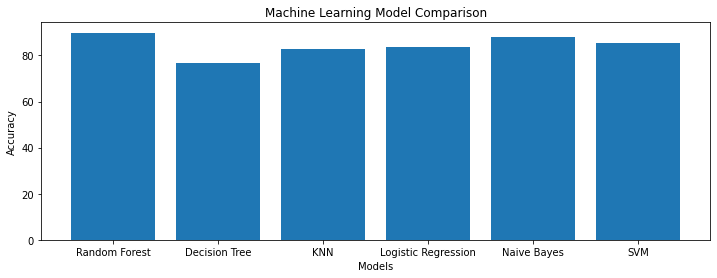

In [61]:
#Accuracy Comparison between models
plt.subplots(figsize=(12,4))
plt.bar(models, acc)
plt.title('Machine Learning Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()